# 10.3 对长、次子头型数据的典型相关分析 

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><li><span><a href="#引言" data-toc-modified-id="引言-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>引言</a></span></li><li><span><a href="#载入原始数据" data-toc-modified-id="载入原始数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>载入原始数据</a></span></li><li><span><a href="#典型相关分析" data-toc-modified-id="典型相关分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>典型相关分析</a></span><ul class="toc-item"><li><span><a href="#数据标准化" data-toc-modified-id="数据标准化-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>数据标准化</a></span></li><li><span><a href="#典型相关系数与典型系数" data-toc-modified-id="典型相关系数与典型系数-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>典型相关系数与典型系数</a></span></li><li><span><a href="#原始变量与典型变量的样本相关系数" data-toc-modified-id="原始变量与典型变量的样本相关系数-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>原始变量与典型变量的样本相关系数</a></span></li><li><span><a href="#典型变量得分" data-toc-modified-id="典型变量得分-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>典型变量得分</a></span></li></<li><span><a href="#相关系数显著性检验" data-toc-modified-id="相关系数显著性检验-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>相关系数显著性检验</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>结论</a></span></li>

## 引言
把线性回归和主成分分析问题推广到多个因变量和多个自变量，同时找因变量的若干线性组合与自变量的若干线性组合，使其组间成对的线性组合的相关性最强，组内的线性组合不相关，且尽可能保存原始变量信息，这就是**典型相关分析**。

**基本分析步骤**如下：首先在每组变量中找出变量的线性组合，使其具有最大相关性，然后再每组变量中找出第二对线性组合，使其分别与第一对线性组合不相关，而第二对线性组合本身具有最大的相关性，如此继续下去，直到两组变量之间的相关性被提取完毕。

本案例中的数据是25个家庭中成年长子和次子的头长和头宽，x1=长子头长，x2=长子头宽，y1=次子头长，y2=次子头宽。我们想要分析长子和次子的头型之间是否有相关关系。由于不能得到总体分布的信息，这里我们使用**样本典型相关分析法**。

## 1.载入原始数据

In [7]:
data = read.table('.//AMSA_data//《应用多元统计分析》（第6版）文本数据（以逗号为间隔）//exec10.3.csv',header=TRUE, sep=",",row.names = 'i')
head(data)
p = 2; q = 2; m = min(p, q)
colnames(data) = c('长子头长','长子头宽','次子头长','次子头宽')

,x1,x2,y1,y2
,<int>,<int>,<int>,<int>
1,191,155,179,145
2,195,149,201,152
3,181,148,185,149
4,183,153,188,149
5,176,144,171,142
6,208,157,192,152


corrplot 0.92 loaded



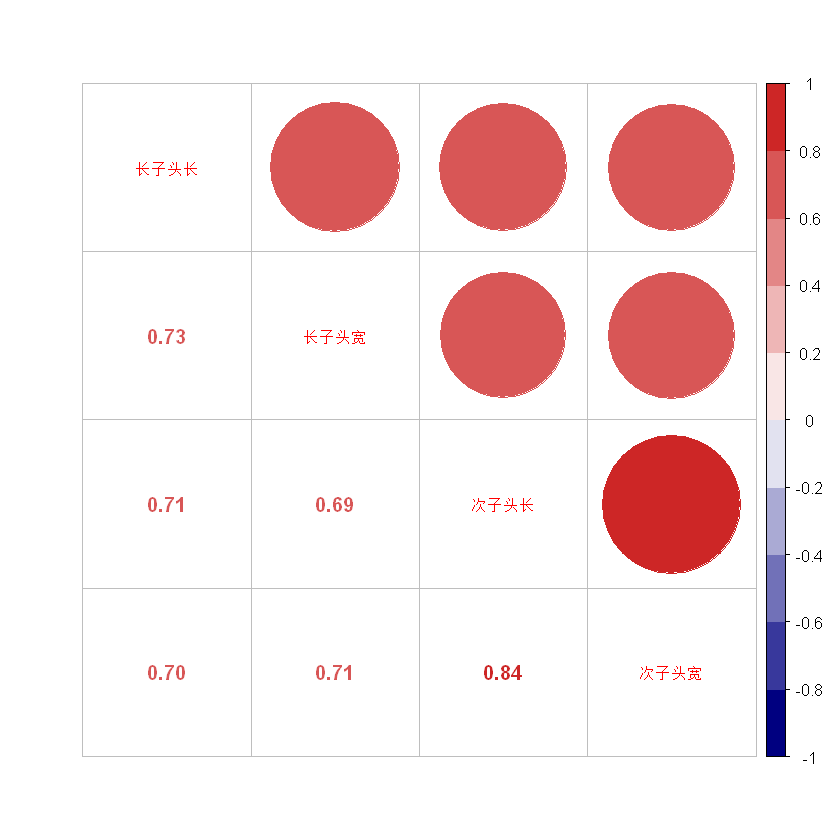

In [2]:
# 绘制热力图观察原始变量的相关性
library("corrplot")
b = cor(as.matrix(data)) # 相关系数矩阵
col = colorRampPalette(c("navy", "white", "firebrick3"))
corrplot(b,type = "upper",col = col(10),tl.pos = "d",tl.cex = 0.75) 
corrplot(b,add = TRUE, type = "lower", method = "number",diag = FALSE,tl.pos = "n", cl.pos = "n",col = col(10))

通过观察数据的结构，我们发现本案例的数据维数较低，每部分变量各自只有两个原始变量。通过绘制各个变量之间的相关系数图可知，两两变量之间均存在较大的正相关性。变量之间具有强相关性是显然的，可能是由于人的头部的形状比大致在某一个比例范围内，并且长次子均遗传于同一套基因，如果扣除这些因素的影响，相关性可能就没有这么强。这也说明了我们分析的仅是相关性而不是因果性。

## 2.典型相关分析

### 2.1数据标准化

假设得到了$X$和$Y$的$n$次独立观测数据。从数据可以估计$X$的方差阵${\boldsymbol{\Sigma}}_{11}$, $Y$的方差阵${\boldsymbol{\Sigma}}_{22}$, 以及$X$与$Y$的协方差阵${\boldsymbol{\Sigma}}_{12}$。

如果从估计的方差和协方差去计算典型相关， 可能出现特征值不小于1的现象， 所以通常把每个分量的$n$个数据进行标准化， 然后基于$X$的相关阵估计$R_{11}$，$Y$的相关阵估计$R_{22}$和$X$与$Y$的相关系数阵的估计$R_{12}$来进行典型相关分析。 根据典型相关的线性变换不变性， 理论上与用原始数据的结果是一样的。

In [3]:
Z = scale(data)  #数据标准化

### 2.2典型相关系数与典型系数

一般地, 第 $\mathrm{i}(1<\mathrm{i} \leq \mathrm{m})$ 对典型变量 $\mu_{i}=a^{\prime} x, v_{i}=b^{\prime} y$ 是指, 找出 $a \in R^{p}, b \in R^{q}$, 在约束条件

$$
a^{\prime} \Sigma_{11} a=1, b^{\prime} \Sigma_{22} b=1
$$

$$
\begin{aligned}
& a^{\prime} \Sigma_{11} a_{k}=0, b^{\prime} \Sigma_{22} b_{k}=0, \quad k=1,2, \ldots, i-1
\end{aligned}
$$

下, 使得

$$
\rho\left(u_{i}, v_{i}\right)=\rho\left(a^{\prime} x, b^{\prime} y\right)=a^{\prime} \Sigma_{12} b
$$

达到最大。

此时的最大值 $\rho_{i}$ 称为第 $\mathrm{i}$ 典型相关系数, 称 $a_{i}, b_{i}$ 为第 $\mathrm{i}$ 对典型系数向量。

In [5]:
# install.packages("CCA")
library(CCA)
cc = cc(Z[, 1:p], Z[, (p+1):(p+q)])  #典型相关分析
round(cc$cor,4) #典型相关系数

[1] 0.7885 0.0537

可以看到，第一对典型变量的相关系数很大，两组变量之间的相关性明显。而第二对典型变量的相关系数非常小，对于信息的提取帮助不大，因此我们可以认为只使用第一对典型变量代表两组变量是合适的。但是我们还需要借助相关系数系数的显著性检验进行辅助判断，见后文。

In [8]:
uname = paste("u", 1:m, sep = "")
vname = paste("v", 1:m, sep = "")
A = cc$xcoef  #x的典型系数
colnames(A) = uname  #添加列名
round(A, 3)

B = cc$ycoef  #y的典型系数
colnames(B) = vname
round(B, 3) 

,u1,u2
长子头长,-0.552,-1.366
长子头宽,-0.522,1.378


,v1,v2
次子头长,-0.504,-1.769
次子头宽,-0.538,1.759


因此，第一对样本典型变量为：
$$u_{1}^{*}=-0.552 x_{1}^{*}-0.522	x_{2}^{*}$$
$$v_{1}^{*}=-0.504 y_{1}^{*}-0.538	y_{2}^{*}$$

第二对样本典型变量为：
$$u_{2}^{*}=-1.366 x_{1}^{*}+1.378	x_{2}^{*}$$
$$v_{2}^{*}=-1.769 y_{1}^{*}+1.759	y_{2}^{*}$$

由于我们根据上述的分析选择了只使用第一对变量，这里我们就仅仅分析第一对样本典型变量的系数。显然的，这四个系数在数值上都非常相近。$u_{1}^{*}$代表了长子的头型的变量，$v_{1}^{*}$代表了次子的头型的变量，而各自的载荷又非常的相近，几乎都在-0.5左右，这说明人的头部的长度和宽度可以一起综合反映头的形状，而无分贡献率高低。也说明我们计算出来的典型变量能够较好地提取出原始变量的信息。

### 2.3原始变量与典型变量的样本相关系数

我们也可以从相关系数的角度来解释典型变量，原始变量与典型变量间的相关系数计算方法如下：

记 $\mathrm{A}=\left(a_{1}, a_{2}, \ldots, a_{m}\right), \mathrm{B}=\left(b_{1}, b_{2}, \ldots, b_{m}\right)$, 则

$$
u=A^{\prime} x, v=B^{\prime} y
$$

则原始变量与典型变量之间的相关矩阵为

$$
\begin{aligned}
& \rho(x, u)=D_{1}^{-1} \Sigma_{11} A \\
& \rho(x, v)=D_{1}^{-1} \Sigma_{12} B \\
& \rho(y, u)=D_{2}^{-1} \Sigma_{21} A \\
& \rho(y, v)=D_{2}^{-1} \Sigma_{22} B
\end{aligned}
$$

其中, $D_{1}=\operatorname{diag}\left(\sqrt{V\left(x_{1}\right)}, \ldots, \sqrt{V\left(x_{p}\right)}\right), \quad D_{2}=\operatorname{diag}\left(\sqrt{V\left(y_{1}\right)}, \ldots, \sqrt{V\left(y_{q}\right)}\right)$

In [12]:
Rxu = cc$scores$corr.X.xscores  #x和其典型变量之间的相关系数
colnames(Rxu) = uname
round(Rxu, 3) 
Ryu = cc$scores$corr.Y.xscores  #y和x的典型变量之间的相关系数
colnames(Ryu) = uname
round(Ryu, 3) 
Rxv = cc$scores$corr.X.yscores  #x和y的典型变量之间的相关系数
colnames(Rxv) = vname
round(Rxv, 3)
Ryv = cc$scores$corr.Y.yscores  #计算y和其典型变量之间的相关系数
colnames(Ryv) = vname 
round(Ryv, 3)

,u1,u2
长子头长,-0.935,-0.354
长子头宽,-0.927,0.375


,u1,u2
次子头长,-0.754,-0.016
次子头宽,-0.758,0.015


,v1,v2
长子头长,-0.737,-0.019
长子头宽,-0.731,0.020


,v1,v2
次子头长,-0.956,-0.293
次子头宽,-0.962,0.274


长子头宽和头长变量与第一典型变量$u_{1}^{*}$、次子头宽和头长变量与$v_{1}^{*}$有大致相同的相关系数，约在-0.95左右；同样地，次子头宽和头长变量与第一典型变量$u_{1}^{*}$、长子头宽和头长变量与$v_{1}^{*}$有大致相同的相关系数，约在-0.75左右。因此，$u_{1}^{*}$较好地代表了长子的头型变量，$v_{1}^{*}$较好地代表了次子的头型变量，这与基于典型系数的解释基本一致。

下面进行可视化分析。作所有原始变量与前两对典型变量得分的相关系数的散点图， 横坐标是与原始变量对应的$u_{1}^{*}$的第一典型系数， 纵坐标是$u_{1}^{*}$的典型系数。长子的头型变量为红色，次子的为蓝色。

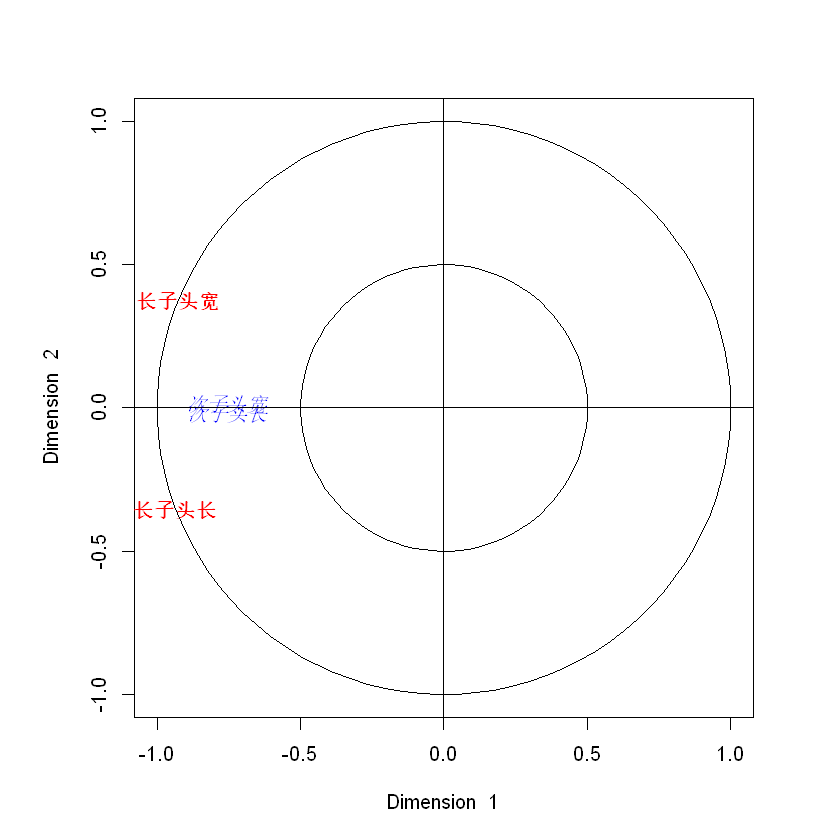

In [13]:
plt.cc(cc, d1 = 1, d2 = 2, 
  type = "v", var.label = TRUE)

可以看到，代表长子头型的两个变量在第一维度上的取值大致相当，代表次子头型的两个变量在第二维度上的取值也大致相当。

### 2.4典型变量得分



将样本 $\left(x_{j}, y_{j}\right), \mathrm{j}=1,2, \ldots, n$ 代入典型变量的定义公式, 有

$$
u_{j i}=\hat{A}^{\prime} x_{j}, \quad v_{j i}=\hat{B}^{\prime} y_{j}, \quad \mathrm{j}=1,2, \ldots, n, \quad i=1,2, \ldots, m
$$

分别称为第 $\mathrm{j}$ 个样品的第 $\mathrm{i}$ 对典型变量得分。

我们还可以画出第一对典型变量得分 $\left(u_{j 1}, v_{j 1}\right), \mathrm{j}=1,2, \ldots, n$ 的散点图, 该图能最大限度地呈 现两组变量之间的相关性, 也可以用来检查是否有 (影响两组相关性的) 异常值出现。如需要, 可再画出第二对或更多对的典型变量得分散点图。

In [9]:
u = cc$scores$xscores  #x的典型变量得分
colnames(u) = uname
v = cc$scores$yscores  #y的典型变量得分
colnames(v) = vname
head(round(cbind(u, v), 3))  #按列合并x和y的典型变量得分，仅仅展示前六列

,u1,u2,v1,v2
1,-0.573,-0.014,0.583,-0.259
2,-0.375,-1.695,-1.084,-2.299
3,0.488,0.077,-0.039,-0.267
4,0.021,0.732,-0.190,-0.796
5,1.053,0.029,1.226,0.364
6,-1.676,-2.019,-0.631,-0.714


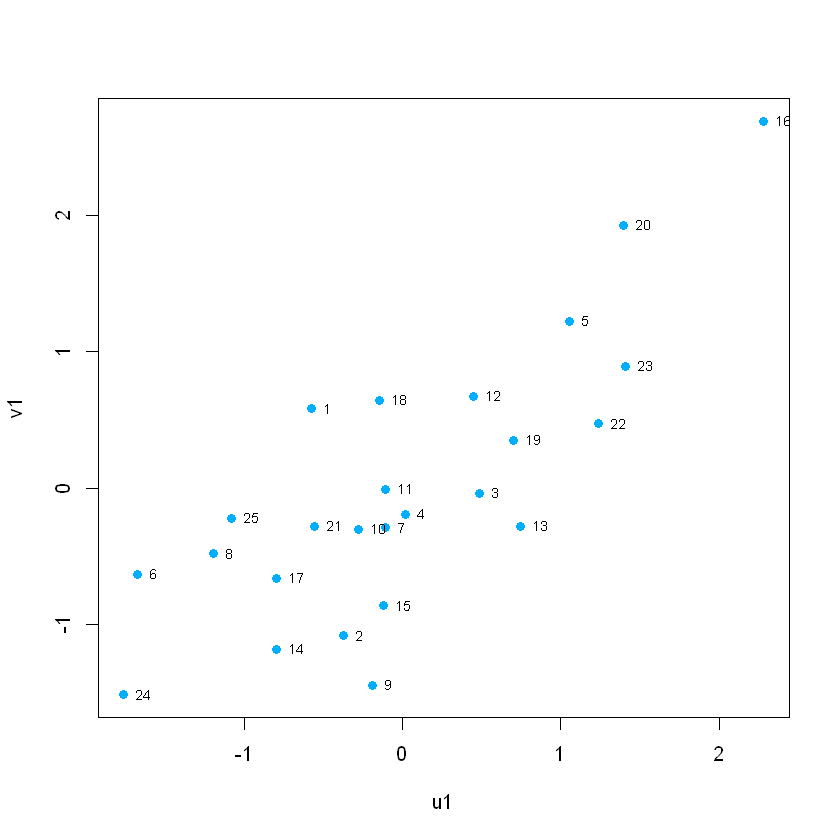

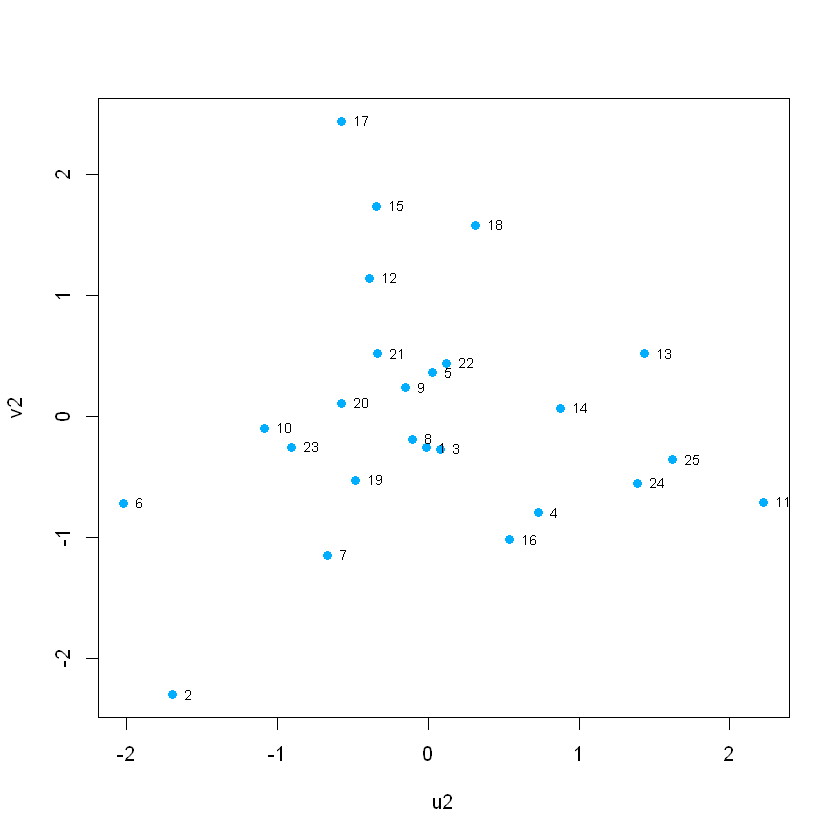

In [47]:
#画出以相关变量U1、V1和U2、V2为坐标的数据散点图
plot(u[, 1], v[, 1], xlab = "u1", ylab = "v1", col="#00aeff",pch=16 )  #作第一对典型变量得分的散点图
text(u[, 1], v[, 1], row.names(data), pos = 4, cex = 0.7)  #为散点添标签
plot(u[, 2], v[, 2], xlab = "u2", ylab = "v2", col="#00aeff",pch=16)  #作第二对典型变量得分的散点图
text(u[, 2], v[, 2], row.names(data), pos = 4, cex = 0.7)  #为散点添标签

由散点图可知，第一典型相关变量分布在一条直线附近，大致呈线性结构；而第二典型相关变量数据很分散，难以看出聚集性规律。与前文分析呼应，这是因为第一典型变量其相关系数为0.78，接近1，所以在一直线附近；而第二典型变量的相关系数是0.05，接近于0，所以很分散。因此根据可视化的分析，我们认为仅选择第一对变量进行分析是合理的。

## 3.相关系数显著性检验

为确定选择多少对典型变量，需要做典型相关系数的显著性检验。若认为相关系数k为0 就没有必要考虑第k对典型变量了。

以总体的检验为例。

设$\begin{array}{l c r}{{\left(\begin{array}{l}{{x}}\\ {{y}}\end{array}\right)\sim N_{p+q}\left(\mu,\Sigma\right),\Sigma\gt 0}}\end{array}$又设$S$为样本协差阵,且$n>p+q$. 考虑假设检验问题
$$H_{0}:\rho _{1}=\rho _{2}=\dots=\rho _{m}=0  $$
$$H_{1}:\rho _{1}, \rho _{2}, \dots, \rho _{m}  至少有一个不为零$$
其中$m=min\{pq\}$。

似然比检验统计量为
$$\Lambda_{1}=\prod_{i=1}^{m}\left(1-r_{i}^{2}\right)$$

对于充分大的$n$，当$H_{0}$成立时，统计量
$$Q_{1}=-\biggr[n-\frac{1}{2}(p+q+3)\biggr]\ln \Lambda_{1}\stackrel{\cdot}{\sim}\chi^{2}\left(p q\right)$$
在给定的$a$下，若$Q_{1}\geq\,\chi_{\alpha}^{2}\left(\,p q\,\right)$，则拒绝$H_{0}$，认为典型变量$u_{1}$与$v_{1}$之间的相关性是显著的；否则，就认为第一个典型相关系数不显著。

重复检验直到对某个$k$值$H_{0}$未被拒绝为止。事实上，检验的总显著性水平已不是$a$了，且易受样本容量大小的影响。因此，检验的结果只宜作为确定典型变量个数的重要参考依据，而不宜作为唯一的依据。通常选择尽可能小的$k$。

In [13]:
# 编写函数进行典型相关分析显著性检验
corcoef.test = function(r,n,p,q){ # r是相关系，n是样本量，p\q是x\y的向量个数
    m = min(p,q) 
    Q = rep(0,m)
    df = rep(0,m)
    pvalues = rep(0,m)
    lambda = 1
    for (k in (m-1):0){
        lambda = lambda*(1-r[k+1]^2) # 似然比检验统计量
        Q[k+1] = -(n-(p+q+3)/2)*log(lambda)  # 每一个m都记录一次
        df[k+1] = (p-k)*(q-k) # 卡方分布的自由度
        pvalues[k+1] = 1-pchisq(Q[k+1],df[k+1]) # p值
    }
    data.frame(Q,df,pvalues)
} 

corcoef.test(r = cc$cor, n = dim(data)[1], p = p, q = q)  #使用创建的函数进行检验

Q,df,pvalues
<dbl>,<dbl>,<dbl>
20.96417998,4,0.0003218897
0.06218088,1,0.8030815916


从结果看出，检验第一对变量的相关系数时，p值远远小于0.05，因此拒绝原假设，认为这对典型变量之间的相关性是显著的，即认为两组变量之间有显著的线性相关性。并且也检验了我们前文分析时只使用第一对典型变量的有效性。

## 结论

通过直观观察典型相关系数对比数值、绘制典型变量得分的散点图、进行相关系数显著性检验等分析，我们在分析时只使用第一对典型变量是有意义的。通过分析典型系数，我们也可以得到典型系数能综合提取原始变量的信息。因而，最终的分析结果是可靠的：长子和次子的头型之间存在显著的线性相关性。